<a href="https://colab.research.google.com/github/ali1810/solub_heroku_new/blob/main/Cyrene_solvent_with_other_solvent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Installation of condacolab to install rdkit ....
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:46
🔁 Restarting kernel...


In [ ]:
### Installing RDKIT 

#!mamba install -c conda-forge rdkit

In [ ]:
### Installation of the libararies ...
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen

In [ ]:
def getAromaticProportion(m):
    aromatic_list = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aromatic = 0
    for i in aromatic_list:
        if i:
            aromatic += 1
    heavy_atom = Lipinski.HeavyAtomCount(m)
    return aromatic / heavy_atom


def generate(smiles):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:

        desc_MolLogP = Crippen.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
        desc_AromaticProportion = getAromaticProportion(mol)
        #desc_Ringcount        =   Descriptors.RingCount(mol)
        desc_TPSA = Descriptors.TPSA(mol)
        #desc_Hdonrs=Lipinski.NumHDonors(mol)
        #desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
        #desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
        #desc_HAcceptors = Lipinski.NumHAcceptors(mol)
        #desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
        desc_Max_Partial_Charge =  Descriptors.MaxPartialCharge(mol)
        desc_FP_density =  Descriptors.FpDensityMorgan1(mol)
        desc_num_valence_electrons = Descriptors.NumValenceElectrons(mol)
        #Ipc      = Descriptors.Ipc(mol)
        #HallKierAlpha= Descriptors.HallKierAlpha(mol)
        Labute_ASA = Descriptors.LabuteASA(mol)
        SP3_frac = Lipinski.FractionCSP3(mol)
        #desc_molMR=Descriptors.MolMR(mol)
        row = np.array([desc_MolLogP, desc_Max_Partial_Charge,
        
                        desc_MolWt,desc_FP_density,Labute_ASA,desc_TPSA,
                        desc_NumRotatableBonds,
                        desc_AromaticProportion,SP3_frac,desc_num_valence_electrons
                        ])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MolLogP", "Max Partial charge","MolWt", "FP density","Labute_ASA","TPSA","NRB","ARP","SP3_frac","NVE"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [ ]:
smiles=['C1CC(=O)C2OCC1O2','CS(=O)C','CN1CCCC1=O.CN1CCCC1=O','O','CN(C)C=O','C1CCOC1','CC1=CC=CC=C1']
names =['Cyrene (Dihydrolevoglucosenon)','Dimethyl sulfoxide(DMSO)','N-Methyl-2-pyrrolidone(NMP)',
        'Water','NN-Dimethyl formamide(DMF)','Tetra Hydro Furan(TTF)','Toluene'] 

In [ ]:
#### Get new dataframe 
import matplotlib.pyplot as plt

import pandas as pd
df = generate(smiles)
#print(sol.SMILES)
#df.head()
#df.head(100)
df1=pd.DataFrame(names, columns=['Solvent'])
df2=pd.concat([df,df1],axis=1)
df2.set_index('Solvent',inplace=True)
df2=df2.T
df2

Solvent,Cyrene (Dihydrolevoglucosenon),Dimethyl sulfoxide(DMSO),N-Methyl-2-pyrrolidone(NMP),Water,NN-Dimethyl formamide(DMF),Tetra Hydro Furan(TTF),Toluene
MolLogP,0.090800,-0.005300,0.477200,-0.824700,-0.295600,0.796800,1.995020
Max Partial charge,0.217719,0.014804,0.221874,-0.411510,0.208685,0.046638,-0.039775
MolWt,128.127000,78.136000,198.266000,18.015000,73.095000,72.107000,92.141000
FP density,1.555556,1.500000,0.857143,1.000000,1.600000,1.000000,1.000000
Labute_ASA,52.940912,28.478447,84.860610,6.849231,31.390491,31.941791,43.796345
TPSA,35.530000,17.070000,40.620000,31.500000,20.310000,9.230000,0.000000
NRB,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
ARP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143
SP3_frac,0.833333,1.000000,0.800000,0.000000,0.666667,1.000000,0.142857
NVE,50.000000,26.000000,80.000000,8.000000,30.000000,30.000000,36.000000


In [ ]:
## Description about the Some Of The descriptor ####
 
  ## FP desnity >>   fingerprint density of the compound 
  ## Labute ASA >>.   Labute Accesible surface area 
  ### TPSA  >>.       Total polar surfce area
  ###. Sp3 fraction>>>   fraction of sp3 hybridised carbon atoms for structures 
  ### ARP >>.   Aromatic Proprtion 
  ### NVE >>.   Number of Valence Electrons 
  ### NRB  >>.  Number of Rotatable bonds 


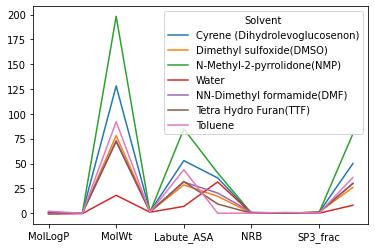

In [ ]:
df2.plot()



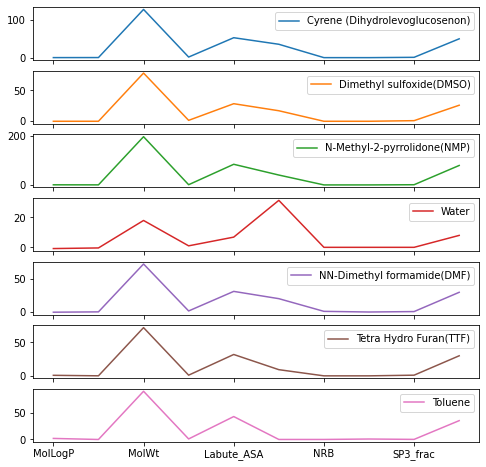

In [ ]:
df2.plot(subplots=True, figsize=(8, 8));


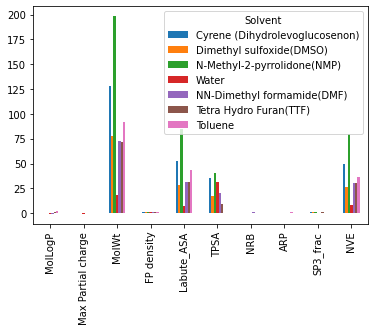

In [ ]:
df2.plot(kind="bar")


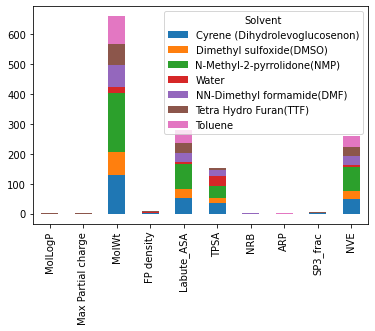

In [ ]:
df2.plot.bar(stacked=True);


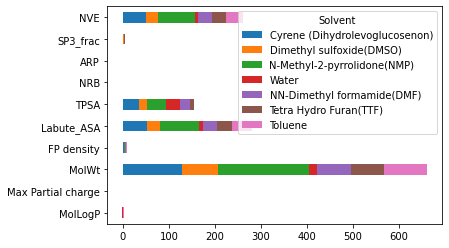

In [ ]:
df2.plot.barh(stacked=True);
